In [ ]:
import pandas as pd
import numpy as np

# Load the combined dataset (created by merge_datasets.py script)
# This dataset already contains data from both videos, shuffled and ready for processing
shuffled_df = pd.read_csv('data/combined_dataset.csv')

print(f"Loaded combined dataset: {shuffled_df.shape}")
print(f"Columns: {list(shuffled_df.columns)[:10]}... (showing first 10)")

# Display the first few rows of the shuffled dataframe
display(shuffled_df.head())

pose_class  left_ankle_x  left_ankle_y  left_ankle_z  left_elbow_x  \
0           8      0.157639      0.256400      0.226083     -0.278321   
1           2      0.052835      0.360992     -0.280406      0.209651   
2           2      0.073723      0.360045     -0.310022      0.256700   
3           5     -0.071469      0.073272     -0.412329     -0.047054   
4           9      0.190233      0.081622     -0.021543     -0.035960   

   left_elbow_y  left_elbow_z  left_hip_x  left_hip_y  left_hip_z  ...  \
0      0.256490     -0.564265    0.027661    0.002712   -0.128295  ...   
1     -0.294648     -0.390274   -0.000499   -0.005003   -0.207466  ...   
2     -0.249055     -0.295454    0.013068   -0.003462   -0.191622  ...   
3      0.026302     -0.610649    0.016112   -0.007248   -0.093325  ...   
4      0.054097     -0.672741    0.025029    0.002019   -0.109478  ...   

   right_knee_x  right_knee_y  right_knee_z  right_shoulder_x  \
0      0.028870      0.157372      0.299968         -0.225490   
1     -0.006466      0.160713      0.150655          0.089265   
2      0.003074      0.157344      0.127441          0.106586   
3      0.055088      0.038462      0.340347         -0.147618   
4     -0.144669      0.040132      0.132605         -0.136983   

   right_shoulder_y  right_shoulder_z  right_wrist_x  right_wrist_y  \
0          0.160737          0.017825      -0.459493       0.278232   
1         -0.189382          0.311809       0.303846      -0.356461   
2         -0.177109          0.355607       0.309302      -0.281638   
3         -0.021985         -0.256821      -0.142035       0.080146   
4          0.004363         -0.307249      -0.118223       0.097770   

   right_wrist_z       video_source  
0      -0.116471  downloaded_video1  
1       0.229663  downloaded_video1  
2       0.352999  downloaded_video1  
3      -0.317092  downloaded_video2  
4      -0.328762  downloaded_video2  

[5 rows x 38 columns]

In [ ]:
shuffled_df.keys()

Index(['pose_class', 'left_ankle_x', 'left_ankle_y', 'left_ankle_z',
       'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'left_hip_x',
       'left_hip_y', 'left_hip_z', 'left_knee_x', 'left_knee_y', 'left_knee_z',
       'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_wrist_x',
       'left_wrist_y', 'left_wrist_z', 'right_ankle_x', 'right_ankle_y',
       'right_ankle_z', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z',
       'right_hip_x', 'right_hip_y', 'right_hip_z', 'right_knee_x',
       'right_knee_y', 'right_knee_z', 'right_shoulder_x', 'right_shoulder_y',
       'right_shoulder_z', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z',
       'video_source'],
      dtype='object')

In [ ]:
def normalize_pose(row):
    # torso length = distance between left shoulder and left hip
    ls = np.array([row['left_shoulder_x'], row['left_shoulder_y'], row['left_shoulder_z']])
    lh = np.array([row['left_hip_x'], row['left_hip_y'], row['left_hip_z']])
    torso_len = np.linalg.norm(ls - lh)
    if torso_len == 0:  # avoid divide by zero
        torso_len = 1.0

    # Normalize all keypoints
    for col in row.keys(): # Use row.keys() to iterate through columns of the row
        if col not in ['pose_class', 'video_source']:
            row[col] = row[col] / torso_len
    return row

In [ ]:
# Apply the normalization function to the shuffled dataframe
normalized_df = shuffled_df.apply(normalize_pose, axis=1)

# Display the first few rows of the normalized dataframe
display(normalized_df.head())

pose_class  left_ankle_x  left_ankle_y  left_ankle_z  left_elbow_x  \
0           8      0.528751      0.860013      0.758324     -0.933540   
1           2      0.236856      1.618307     -1.257043      0.939852   
2           2      0.315579      1.541200     -1.327072      1.098826   
3           5     -0.160417      0.164464     -0.925498     -0.105615   
4           9      0.350706      0.150476     -0.039716     -0.066294   

   left_elbow_y  left_elbow_z  left_hip_x  left_hip_y  left_hip_z  ...  \
0      0.860314     -1.892648    0.092780    0.009095   -0.430325  ...   
1     -1.320888     -1.749574   -0.002235   -0.022428   -0.930058  ...   
2     -1.066098     -1.264713    0.055940   -0.014818   -0.820253  ...   
3      0.059036     -1.370641    0.036164   -0.016268   -0.209474  ...   
4      0.099732     -1.240238    0.046143    0.003722   -0.201830  ...   

   right_knee_x  right_knee_y  right_knee_z  right_shoulder_x  \
0      0.096836      0.527853      1.006148         -0.756334   
1     -0.028985      0.720466      0.675378          0.400171   
2      0.013160      0.673523      0.545521          0.456249   
3      0.123647      0.086331      0.763930         -0.331339   
4     -0.266706      0.073985      0.244466         -0.252537   

   right_shoulder_y  right_shoulder_z  right_wrist_x  right_wrist_y  \
0          0.539142          0.059789      -1.541224       0.933240   
1         -0.848989          1.397820       1.362123      -1.597994   
2         -0.758130          1.522201       1.323993      -1.205574   
3         -0.049346         -0.576451      -0.318806       0.179892   
4          0.008044         -0.566432      -0.217952       0.180244   

   right_wrist_z       video_source  
0      -0.390663  downloaded_video1  
1       1.029565  downloaded_video1  
2       1.511039  downloaded_video1  
3      -0.711734  downloaded_video2  
4      -0.606093  downloaded_video2  

[5 rows x 38 columns]

In [ ]:
len(normalized_df)

762

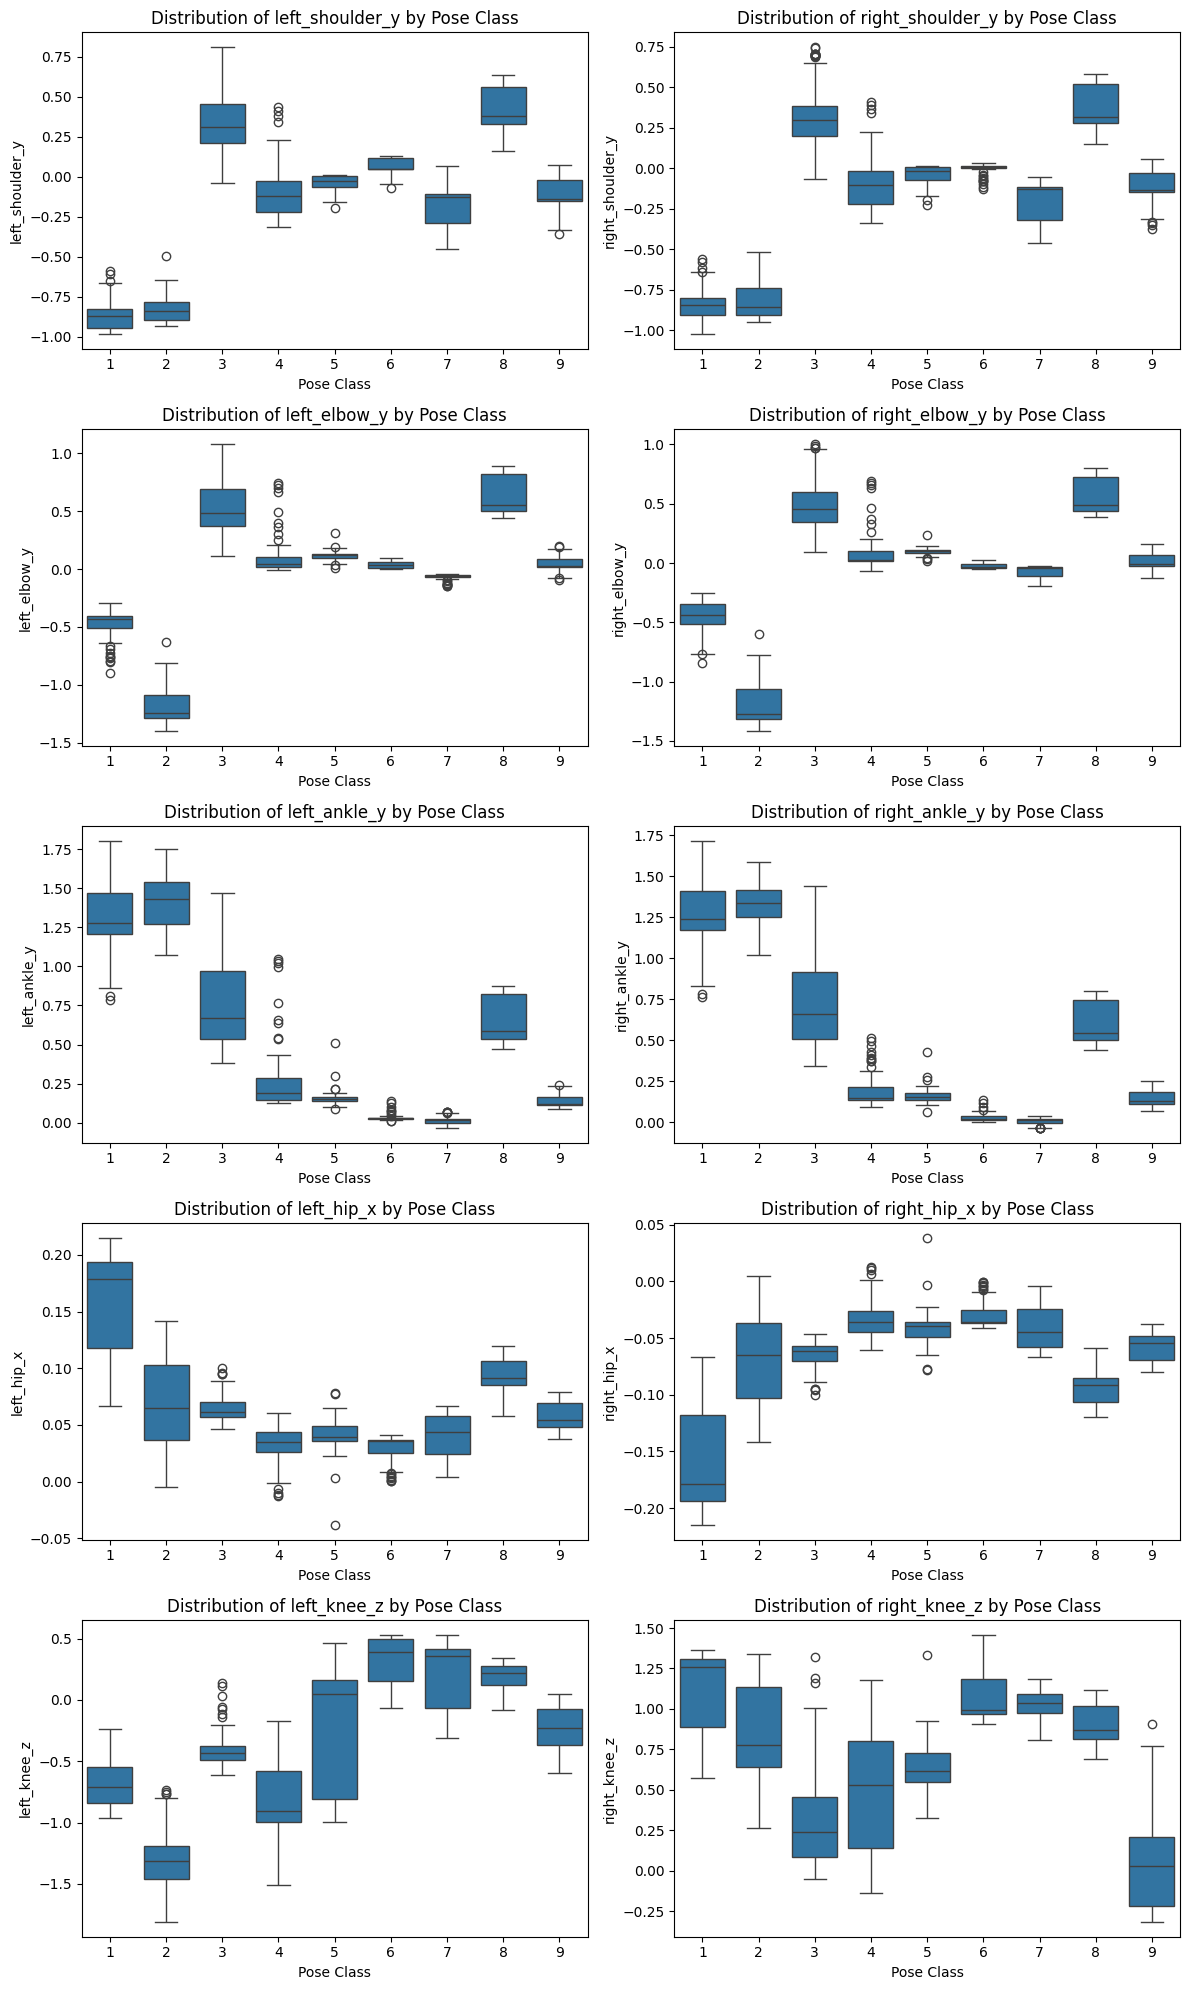


Interpretation:
These box plots show the distribution of the selected landmark coordinates for each pose class.
If the box plots for different classes show distinct distributions (different medians, ranges, etc.),
it suggests that the feature is useful for distinguishing between those classes.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few representative landmark coordinates for visualization
# We'll pick a few from different body parts (e.g., shoulders, elbows, ankles)
selected_features = [
    'left_shoulder_y',
    'right_shoulder_y',
    'left_elbow_y',
    'right_elbow_y',
    'left_ankle_y',
    'right_ankle_y',
    'left_hip_x',
    'right_hip_x',
    'left_knee_z',
    'right_knee_z'
]

# Ensure selected features are in the dataframe columns
available_features = [f for f in selected_features if f in normalized_df.columns]

if not available_features:
    print("Selected features not found in the dataframe.")
else:
    # Create box plots for each selected feature against the pose class
    num_features = len(available_features)
    n_cols = 2 # Number of columns for subplots
    n_rows = (num_features + n_cols - 1) // n_cols # Calculate number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
    axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

    for i, feature in enumerate(available_features):
        sns.boxplot(x='pose_class', y=feature, data=normalized_df, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by Pose Class')
        axes[i].set_xlabel('Pose Class')
        axes[i].set_ylabel(feature)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    print("\nInterpretation:")
    print("These box plots show the distribution of the selected landmark coordinates for each pose class.")
    print("If the box plots for different classes show distinct distributions (different medians, ranges, etc.),")
    print("it suggests that the feature is useful for distinguishing between those classes.")

In [ ]:
import pandas as pd

# Function to remove outliers using IQR
def remove_outliers_iqr(df, group_col, feature_cols):
    cleaned_df = pd.DataFrame()
    for group_value, group_df in df.groupby(group_col):
        for col in feature_cols:
            Q1 = group_df[col].quantile(0.25)
            Q3 = group_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            group_df = group_df[(group_df[col] >= lower_bound) & (group_df[col] <= upper_bound)]
        cleaned_df = pd.concat([cleaned_df, group_df])
    return cleaned_df.reset_index(drop=True)

# Identify feature columns (all except pose_class and video_source)
feature_columns = [col for col in normalized_df.columns if col not in ['pose_class', 'video_source']]

# Remove outliers from the normalized dataframe, grouped by pose_class
cleaned_df = remove_outliers_iqr(normalized_df, 'pose_class', feature_columns)

print(f"Original dataset size: {len(normalized_df)}")
print(f"Dataset size after outlier removal: {len(cleaned_df)}")

# Display the first few rows of the cleaned dataframe
display(cleaned_df.head())

Original dataset size: 762
Dataset size after outlier removal: 315


pose_class  left_ankle_x  left_ankle_y  left_ankle_z  left_elbow_x  \
0           1      0.136038      1.220108     -0.348027      0.286330   
1           1      0.143164      1.265456     -0.329565      0.293376   
2           1      0.146641      1.194502      0.052709      0.302570   
3           1      0.139192      1.200128      0.129835      0.289089   
4           1      0.155178      1.200792     -0.412165      0.306921   

   left_elbow_y  left_elbow_z  left_hip_x  left_hip_y  left_hip_z  ...  \
0     -0.412790     -1.070032    0.187836   -0.003063   -0.806505  ...   
1     -0.429546     -1.039306    0.193528   -0.003484   -0.827065  ...   
2     -0.399382     -1.054300    0.178135   -0.002105   -0.769864  ...   
3     -0.405530     -1.094519    0.182758   -0.002703   -0.782783  ...   
4     -0.390577     -1.049897    0.177124   -0.003636   -0.801066  ...   

   right_knee_x  right_knee_y  right_knee_z  right_shoulder_x  \
0     -0.131753      0.604938      1.277990         -0.288454   
1     -0.136720      0.629143      1.314337         -0.299309   
2     -0.123098      0.592857      1.265759         -0.240398   
3     -0.130300      0.598352      1.250043         -0.260991   
4     -0.120348      0.593700      1.336333         -0.239775   

   right_shoulder_y  right_shoulder_z  right_wrist_x  right_wrist_y  \
0         -0.805745          1.030267      -0.423005      -0.612274   
1         -0.832965          1.151158      -0.429956      -0.627720   
2         -0.788222          1.081955      -0.396692      -0.596513   
3         -0.794675          1.012525      -0.403700      -0.602997   
4         -0.782377          1.081020      -0.392060      -0.578714   

   right_wrist_z       video_source  
0      -2.276436  downloaded_video2  
1      -2.078628  downloaded_video2  
2      -1.977432  downloaded_video2  
3      -2.255337  downloaded_video2  
4      -1.926613  downloaded_video2  

[5 rows x 38 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
# Exclude 'pose_class' and 'video_source' from features
X = cleaned_df.drop(['pose_class', 'video_source'], axis=1)
y = cleaned_df['pose_class']

# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

print(f"Original dataset shape: {cleaned_df.shape}")
print(f"Training set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")

# Display the first few rows of the training features
print("\nFirst 5 rows of training features (X_train):")
display(X_train.head())

# Display the first few rows of the testing features
print("\nFirst 5 rows of testing features (X_test):")
display(X_test.head())

# Display the first few values of the training target
print("\nFirst 5 values of training target (y_train):")
display(y_train.head())

# Display the first few values of the testing target
print("\nFirst 5 values of testing target (y_test):")
display(y_test.head())

Original dataset shape: (315, 38)
Training set shape (X_train): (283, 36)
Testing set shape (X_test): (32, 36)
Training target shape (y_train): (283,)
Testing target shape (y_test): (32,)

First 5 rows of training features (X_train):


left_ankle_x  left_ankle_y  left_ankle_z  left_elbow_x  left_elbow_y  \
276      0.374314      0.548672      1.153146     -0.369608      0.528036   
82       0.217667      1.619031     -1.271022      0.732671     -1.335671   
289      0.544100      0.800719      0.952009     -0.838889      0.832092   
128      0.307630      1.537414     -1.265027      0.998217     -1.105209   
301      0.503797      0.113770      0.837203     -0.082630      0.019100   

     left_elbow_z  left_hip_x  left_hip_y  left_hip_z  left_knee_x  ...  \
276     -2.108486    0.107537    0.016822   -0.373504     0.235298  ...   
82      -1.985346    0.031805   -0.009038   -0.819002     0.113999  ...   
289     -2.017919    0.086312    0.014543   -0.422385     0.313682  ...   
128     -1.130567    0.037234   -0.013028   -0.771301     0.132897  ...   
301     -1.264574    0.074642    0.010973   -0.182252     0.260607  ...   

     right_hip_z  right_knee_x  right_knee_y  right_knee_z  right_shoulder_x  \
276     0.373504      0.078532      0.249958      0.822577         -0.504616   
82      0.819002     -0.058286      0.722231      0.779470          0.294146   
289     0.422385      0.136316      0.497456      1.116615         -0.686511   
128     0.771301      0.056351      0.681527      0.463556          0.425185   
301     0.182252     -0.342844     -0.074275     -0.205837         -0.310035   

     right_shoulder_y  right_shoulder_z  right_wrist_x  right_wrist_y  \
276          0.305163         -0.643713      -0.990432       0.608982   
82          -0.896875          1.081715       0.980862      -1.679151   
289          0.544973         -0.026850      -1.440712       0.891883   
128         -0.772943          1.557993       1.234355      -1.300009   
301         -0.143515         -0.424070      -0.317313       0.086534   

     right_wrist_z  
276      -1.020993  
82        0.737936  
289      -0.409494  
128       1.488723  
301      -0.586731  

[5 rows x 36 columns]


First 5 rows of testing features (X_test):


left_ankle_x  left_ankle_y  left_ankle_z  left_elbow_x  left_elbow_y  \
7        0.138087      1.225472      0.104122      0.294950     -0.415514   
285      0.324099      0.486264      0.782233     -0.452962      0.445118   
130      0.266543      1.472642     -1.126037      1.191253     -1.007091   
42       0.136809      1.217670      0.129702      0.292147     -0.412348   
117      0.406691      1.251729     -0.750885      0.673556     -1.249503   

     left_elbow_z  left_hip_x  left_hip_y  left_hip_z  left_knee_x  ...  \
7       -1.100780    0.188042   -0.002759   -0.796893     0.166197  ...   
285     -2.152983    0.061278    0.002248   -0.347886     0.218579  ...   
130     -1.586384    0.000056   -0.022266   -0.894792    -0.017105  ...   
42      -1.111163    0.186567   -0.002749   -0.793645     0.167115  ...   
117     -2.683667    0.107177   -0.016628   -1.182617     0.189998  ...   

     right_hip_z  right_knee_x  right_knee_y  right_knee_z  right_shoulder_x  \
7       0.796893     -0.134205      0.611681      1.244973         -0.274077   
285     0.347886      0.118971      0.250653      0.832501         -0.462135   
130     0.894792     -0.005141      0.681442      0.829543          0.580849   
42      0.793645     -0.134182      0.607559      1.248483         -0.270372   
117     1.182617      0.004255      0.600247      1.115270          0.143171   

     right_shoulder_y  right_shoulder_z  right_wrist_x  right_wrist_y  \
7           -0.812533          1.036342      -0.416312      -0.616529   
285          0.265299         -0.508469      -0.932985       0.535682   
130         -0.711721          1.097237       1.764263      -1.001029   
42          -0.806893          1.028862      -0.412302      -0.612145   
117         -0.905206          1.908666       0.501053      -1.632798   

     right_wrist_z  
7        -2.328298  
285      -0.929143  
130       0.720525  
42       -2.307398  
117       2.305479  

[5 rows x 36 columns]


First 5 values of training target (y_train):


276    8
82     2
289    8
128    2
301    9
Name: pose_class, dtype: int64


First 5 values of testing target (y_test):


7      1
285    8
130    2
42     1
117    2
Name: pose_class, dtype: int64

# Task
Train a neural network classifier with a bottleneck layer and early stopping using PyTorch on the provided training and testing data.

## Define the neural network architecture

### Subtask:
Create a PyTorch `nn.Module` that includes a bottleneck layer.


**Reasoning**:
The subtask is to create a PyTorch neural network model with a bottleneck layer. This requires defining a class that inherits from `torch.nn.Module` and defining the layers including the bottleneck in the `__init__` method and the forward pass in the `forward` method.



In [ ]:
import torch
import torch.nn as nn

class PoseClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim1, bottleneck_dim, hidden_dim2, output_dim):
        super(PoseClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, bottleneck_dim) # Bottleneck layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(bottleneck_dim, hidden_dim2)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

**Reasoning**:
The PyTorch model class has been defined. The next step is to instantiate the model and ensure its structure is correct for the given input and output dimensions, which are derived from the prepared training data `X_train` and `y_train`.



In [ ]:
# Determine input and output dimensions
input_dim = X_train.shape[1]
output_dim = len(y_train.unique())

# Define dimensions for hidden and bottleneck layers
hidden_dim1 = 64
bottleneck_dim = 16 # Smaller than hidden_dim1 and hidden_dim2
hidden_dim2 = 32

# Instantiate the model
model = PoseClassifier(input_dim, hidden_dim1, bottleneck_dim, hidden_dim2, output_dim)

print("Model Architecture:")
print(model)

# Example forward pass with dummy data to verify dimensions
dummy_input = torch.randn(1, input_dim) # Batch size of 1
output = model(dummy_input)
print("\nOutput shape for dummy input:", output.shape)

Model Architecture:
PoseClassifier(
  (fc1): Linear(in_features=36, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=16, out_features=32, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=32, out_features=9, bias=True)
)

Output shape for dummy input: torch.Size([1, 9])


## Prepare dataloaders

### Subtask:
Convert the pandas DataFrames (X_train, y_train, X_test, y_test) into PyTorch Tensors and create `DataLoader` instances for training and testing.


**Reasoning**:
Convert the pandas DataFrames/Series into PyTorch tensors and create DataLoader instances for training and testing data.



In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert pandas DataFrames/Series to PyTorch tensors
# Features (X) should be float32
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Target (y) should be long (for categorical cross-entropy)
# Subtract 1 from labels if they are 1-indexed to make them 0-indexed
# Check min value in y_train to determine if adjustment is needed
if y_train.min() > 0:
    y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test.values - 1, dtype=torch.long)
else:
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


# Create TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define batch size
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print shapes and number of batches
print("Shape of X_train_tensor:", X_train_tensor.shape)
print("Shape of y_train_tensor:", y_train_tensor.shape)
print("Shape of X_test_tensor:", X_test_tensor.shape)
print("Shape of y_test_tensor:", y_test_tensor.shape)

print("\nNumber of batches in train_loader:", len(train_loader))
print("Number of batches in test_loader:", len(test_loader))

Shape of X_train_tensor: torch.Size([283, 36])
Shape of y_train_tensor: torch.Size([283])
Shape of X_test_tensor: torch.Size([32, 36])
Shape of y_test_tensor: torch.Size([32])

Number of batches in train_loader: 9
Number of batches in test_loader: 1


## Define loss function and optimizer

### Subtask:
Define an appropriate loss function (e.g., CrossEntropyLoss) and an optimizer (e.g., Adam) for the neural network model.


**Reasoning**:
Define the loss function and optimizer for the model as requested by the subtask.



In [ ]:
import torch.optim as optim

# Define the loss function (Cross-Entropy for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam optimizer with a specified learning rate)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print the defined loss function and optimizer
print("Loss Function:", criterion)
print("Optimizer:", optimizer)

Loss Function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## Implement early stopping

### Subtask:
Implement early stopping to prevent overfitting during training.


**Reasoning**:
Implement the EarlyStopping class based on the instructions.



In [ ]:
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                           Default: 0
            path (str): Path for the checkpoint to be saved to.
                        Default: 'checkpoint.pt'
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        """
        Args:
            val_loss (float): Current validation loss.
            model (torch.nn.Module): The PyTorch model to save.
        """
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """Saves model when validation loss decrease."""
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


## Train the model

### Subtask:
Implement the training loop, including forward pass, backward pass, optimizer step, and tracking of training and validation metrics. Incorporate the early stopping logic within the training loop.


**Reasoning**:
Implement the training loop including early stopping logic as requested in the subtask description.



In [ ]:
import torch
import time

# Instantiate the EarlyStopping class
early_stopping = EarlyStopping(patience=10, verbose=True) # You can adjust patience

# Define the number of epochs
num_epochs = 100 # Set a reasonably large number, early stopping will stop it

# Initialize lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

print("Starting training...")
for epoch in range(num_epochs):
    start_time = time.time()
    model.train() # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad() # Zero the gradients
        loss.backward()       # Calculate gradients
        optimizer.step()      # Update weights

        # Track training loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = 100 * correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    model.eval() # Set the model to evaluation mode
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    # Validation loop
    with torch.no_grad(): # Disable gradient calculation for validation
        for inputs, labels in test_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Track validation loss and accuracy
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / len(test_loader)
    epoch_val_accuracy = 100 * correct_val / total_val
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    end_time = time.time()
    epoch_duration = end_time - start_time

    # Print epoch metrics
    print(f'Epoch [{epoch+1}/{num_epochs}], Duration: {epoch_duration:.2f}s, '
          f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.2f}%, '
          f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.2f}%')

    # Early stopping check
    early_stopping(epoch_val_loss, model)

    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

print("\nFinished training.")

# Load the best model weights saved by early stopping
model.load_state_dict(torch.load('checkpoint.pt'))
print("Loaded best model weights.")


Starting training...
Epoch [1/100], Duration: 0.24s, Train Loss: 2.1923, Train Acc: 21.91%, Val Loss: 2.1764, Val Acc: 21.88%
Validation loss decreased (inf --> 2.176356). Saving model ...
Epoch [2/100], Duration: 0.30s, Train Loss: 2.1605, Train Acc: 21.91%, Val Loss: 2.1399, Val Acc: 21.88%
Validation loss decreased (2.176356 --> 2.139860). Saving model ...
Epoch [3/100], Duration: 0.30s, Train Loss: 2.1087, Train Acc: 21.91%, Val Loss: 2.0729, Val Acc: 21.88%
Validation loss decreased (2.139860 --> 2.072940). Saving model ...
Epoch [4/100], Duration: 0.30s, Train Loss: 2.0278, Train Acc: 21.91%, Val Loss: 1.9700, Val Acc: 21.88%
Validation loss decreased (2.072940 --> 1.970042). Saving model ...
Epoch [5/100], Duration: 0.30s, Train Loss: 1.8962, Train Acc: 39.93%, Val Loss: 1.7979, Val Acc: 50.00%
Validation loss decreased (1.970042 --> 1.797871). Saving model ...
Epoch [6/100], Duration: 0.39s, Train Loss: 1.6769, Train Acc: 50.53%, Val Loss: 1.5597, Val Acc: 50.00%
Validation los


Evaluation Results (on test set after outlier removal):
Test Loss: 0.0012
Test Accuracy: 100.00%

Confusion Matrix (Test Set):
[[5 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 1]]


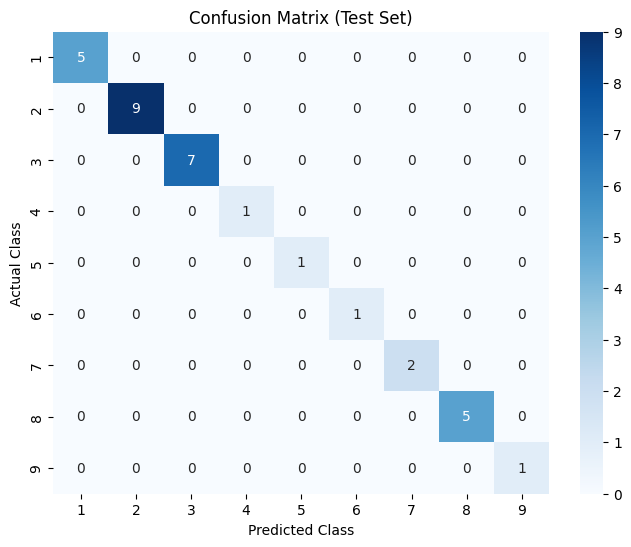


--- Evaluation on the Entire Dataset (before outlier removal) ---
Loss on Entire Dataset: 0.5342
Accuracy on Entire Dataset: 86.48%

Confusion Matrix (Entire Dataset):
[[132   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0]
 [  0   0 146   0   0   0   0   4   0]
 [  0   0  19  39   2   0   0   0   0]
 [  0   0   0  15  29   0   0   0   1]
 [  0   0   0   0   0  31  29   0   0]
 [  0   0   0   0   0   0  75   0   0]
 [  0   0   0   0   0   0   0  60   0]
 [  0   0  12  13   0   0   8   0  42]]


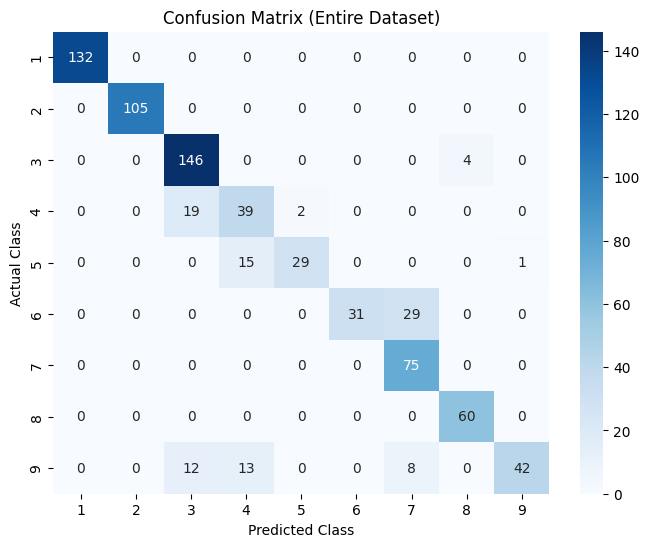

In [ ]:
import torch
import torch.nn.functional as F # Import F for softmax
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test set (data after outlier removal)
model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation
    correct = 0
    total = 0
    test_loss = 0.0
    all_labels_test = []
    all_predicted_test = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels_test.extend(labels.tolist())
        all_predicted_test.extend(predicted.tolist())


    final_test_loss = test_loss / len(test_loader)
    final_test_accuracy = 100 * correct / total

print(f'\nEvaluation Results (on test set after outlier removal):')
print(f'Test Loss: {final_test_loss:.4f}')
print(f'Test Accuracy: {final_test_accuracy:.2f}%')

# Confusion Matrix for the test set
cm_test = confusion_matrix(all_labels_test, all_predicted_test)
print("\nConfusion Matrix (Test Set):")
print(cm_test)

plt.figure(figsize=(8, 6))
# Adjust xticklabels and yticklabels to match the class indices (0-indexed)
# Assuming classes were 1-9, so 0-indexed labels are 0-8.
# We need to map these back to the original 1-9 labels for display.
# If y_test.unique() contains the original labels (1-9), use sorted(y_test.unique()).
# If y_test_tensor was 0-indexed, then y_test.unique() might still contain original labels if it wasn't re-assigned.
# A safer way is to get the unique values from the 0-indexed labels used for training.
unique_test_labels = sorted(list(set(all_labels_test)))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=[l + 1 for l in unique_test_labels],
            yticklabels=[l + 1 for l in unique_test_labels])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix (Test Set)')
plt.show()


# --- Add evaluation on the entire dataset (before outlier removal) ---
if 'normalized_df' in locals() and normalized_df is not None:
    print("\n--- Evaluation on the Entire Dataset (before outlier removal) ---")

    # Prepare the entire dataset for evaluation
    X_entire = normalized_df.drop(['pose_class', 'video_source'], axis=1).values
    y_entire = normalized_df['pose_class'].values

    # Convert to PyTorch tensors
    X_entire_tensor = torch.tensor(X_entire, dtype=torch.float32)
    # Subtract 1 from labels if they are 1-indexed to make them 0-indexed
    if y_entire.min() > 0:
        y_entire_tensor = torch.tensor(y_entire - 1, dtype=torch.long)
    else:
        y_entire_tensor = torch.tensor(y_entire, dtype=torch.long)


    with torch.no_grad():
        outputs_entire = model(X_entire_tensor)
        loss_entire = criterion(outputs_entire, y_entire_tensor)
        _, predicted_entire_tensor = torch.max(outputs_entire.data, 1)

        total_entire = y_entire_tensor.size(0)
        correct_entire = (predicted_entire_tensor == y_entire_tensor).sum().item()

        accuracy_entire = 100 * correct_entire / total_entire
        loss_entire_avg = loss_entire.item() # Get the scalar loss value

        all_labels_entire = y_entire_tensor.tolist()
        all_predicted_entire = predicted_entire_tensor.tolist()

    print(f'Loss on Entire Dataset: {loss_entire_avg:.4f}')
    print(f'Accuracy on Entire Dataset: {accuracy_entire:.2f}%')

    # Confusion Matrix for the entire dataset
    cm_entire = confusion_matrix(all_labels_entire, all_predicted_entire)
    print("\nConfusion Matrix (Entire Dataset):")
    print(cm_entire)

    plt.figure(figsize=(8, 6))
    # Adjust xticklabels and yticklabels to match the class indices (0-indexed)
    unique_entire_labels = sorted(list(set(all_labels_entire)))
    sns.heatmap(cm_entire, annot=True, fmt='d', cmap='Blues',
                xticklabels=[l + 1 for l in unique_entire_labels],
                yticklabels=[l + 1 for l in unique_entire_labels])
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Confusion Matrix (Entire Dataset)')
    plt.show()


else:
    print("\nNormalized DataFrame not found. Cannot perform evaluation on the entire dataset.")

## Create a wrapper function/script

### Subtask:
Combine all the above steps into a single function or script that takes the input video path and outputs the annotated video.


**Reasoning**:
Encapsulate all the previous steps into a single function as requested by the subtask. This involves combining the video processing, model loading, inference, and annotation logic.



In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import json
import os
import torch
import torch.nn as nn
import torch.nn.functional as F


# Define the Neural Network model class (same as in previous steps)
class PoseClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim1, bottleneck_dim, hidden_dim2, output_dim):
        super(PoseClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, bottleneck_dim) # Bottleneck layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(bottleneck_dim, hidden_dim2)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize MediaPipe outside the function to avoid re-initialization overhead
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_drawing_styles

# Landmarks of interest (reduced set), same as used for training
LANDMARKS_OF_INTEREST = {
    11: "left_shoulder",
    12: "right_shoulder",
    13: "left_elbow",
    14: "right_elbow",
    15: "left_wrist",
    16: "right_wrist",
    23: "left_hip",
    24: "right_hip",
    25: "left_knee",
    26: "right_knee",
    27: "left_ankle",
    28: "right_ankle"
}

def process_and_classify_yoga_video(input_video_path, model_checkpoint_path='checkpoint.pt'):
    """
    Processes a yoga video, classifies poses using a trained model, and generates an annotated video.

    Args:
        input_video_path (str): Path to the input yoga video file.
        model_checkpoint_path (str): Path to the saved PyTorch model checkpoint.

    Returns:
        str: Path to the generated annotated output video, or None if processing fails.
    """
    # --- Step 1: Video Processing and Pose Estimation ---
    # This part is adapted from the previous process_video_with_dataset_creation function
    pose_estimator = mp_pose.Pose(
        static_image_mode=False,
        model_complexity=1,
        enable_segmentation=False,
        min_detection_confidence=0.3,
        min_tracking_confidence=0.5
    )

    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        print(f"Error: Could not open video file '{input_video_path}'")
        return None

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if fps == 0 or width == 0 or height == 0 or total_frames == 0:
        print(f"Error: Invalid video properties for '{input_video_path}'.")
        cap.release()
        return None

    # Prepare data storage for inference
    inference_data_rows = []
    all_frames_landmarks_for_drawing = {} # Store landmarks for drawing later

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1

        print(f"Extracting landmarks from frame {frame_count}/{total_frames}", end='\r')

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose_estimator.process(rgb_frame)

        inference_row = {}
        landmarks_for_current_frame = None # Store landmarks for drawing

        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            landmarks_for_current_frame = results.pose_landmarks # Store for drawing later

            # Mid-hip as center reference (waist center) for normalization
            center_x = (landmarks[23].x + landmarks[24].x) / 2 if landmarks[23].visibility > 0.5 and landmarks[24].visibility > 0.5 else 0.0
            center_y = (landmarks[23].y + landmarks[24].y) / 2 if landmarks[23].visibility > 0.5 and landmarks[24].visibility > 0.5 else 0.0
            center_z = (landmarks[23].z + landmarks[24].z) / 2 if landmarks[23].visibility > 0.5 and landmarks[24].visibility > 0.5 else 0.0

            # Extract and normalize relative coordinates for all landmarks of interest
            # Fill with 0.0 if landmark is not visible or hip center is not reliable
            # Use the same normalization approach as in the training data preparation
            temp_inference_row = {}
            valid_landmark_count = 0
            for idx, name in LANDMARKS_OF_INTEREST.items():
                lm = landmarks[idx]
                if lm.visibility < 0.5: # Check visibility threshold
                     temp_inference_row[f'{name}_x'] = 0.0
                     temp_inference_row[f'{name}_y'] = 0.0
                     temp_inference_row[f'{name}_z'] = 0.0
                else:
                    rel_x = lm.x - center_x
                    rel_y = lm.y - center_y
                    rel_z = lm.z - center_z

                    # Calculate torso length for normalization, only if hip and shoulder are visible
                    torso_len = 1.0 # Default
                    if landmarks[11].visibility > 0.5 and landmarks[12].visibility > 0.5 and landmarks[23].visibility > 0.5 and landmarks[24].visibility > 0.5:
                         ls_norm = np.array([landmarks[11].x - center_x, landmarks[11].y - center_y, landmarks[11].z - center_z])
                         lh_norm = np.array([landmarks[23].x - center_x, landmarks[23].y - center_y, landmarks[23].z - center_z])
                         torso_len_calc = np.linalg.norm(ls_norm - lh_norm)
                         if torso_len_calc > 0:
                            torso_len = torso_len_calc

                    temp_inference_row[f'{name}_x'] = rel_x / torso_len
                    temp_inference_row[f'{name}_y'] = rel_y / torso_len
                    temp_inference_row[f'{name}_z'] = rel_z / torso_len
                    valid_landmark_count += 1

            # Only add to inference data if a reasonable number of landmarks are visible
            if valid_landmark_count >= len(LANDMARKS_OF_INTEREST) / 2: # Example threshold
                 inference_row = temp_inference_row
            # else: keep inference_row empty, it won't be added to the list

        # Store data for inference
        if inference_row:
             inference_data_rows.append(inference_row)
             # Store landmarks for drawing ONLY if data was collected for inference
             all_frames_landmarks_for_drawing[frame_count] = landmarks_for_current_frame
        else:
             # If no valid data for inference, still store None for drawing for this frame
             all_frames_landmarks_for_drawing[frame_count] = None


    cap.release()
    pose_estimator.close()
    print("\nLandmark extraction complete.")

    if not inference_data_rows:
        print("No valid pose data found in the video for inference.")
        return None

    # Convert collected data to DataFrame for inference
    inference_df = pd.DataFrame(inference_data_rows)

    # --- Step 2: Load the Trained Model ---
    # Define model architecture (must match trained model)
    input_dim = len([col for col in inference_df.columns]) # Number of feature columns
    # Use the output_dim from the training phase
    # Based on previous training logs, the model was trained on 9 classes (1-9)
    output_dim = 9 # Adjust if your actual classes are different

    # Define dimensions for hidden and bottleneck layers (must match trained model)
    hidden_dim1 = 64
    bottleneck_dim = 16
    hidden_dim2 = 32

    model = PoseClassifier(input_dim, hidden_dim1, bottleneck_dim, hidden_dim2, output_dim)

    # Load the saved state dictionary
    if not os.path.exists(model_checkpoint_path):
         print(f"Error: Model checkpoint '{model_checkpoint_path}' not found.")
         return None

    try:
        model.load_state_dict(torch.load(model_checkpoint_path))
        print(f"Successfully loaded model weights from {model_checkpoint_path}")
    except Exception as e:
        print(f"Error loading model weights: {e}")
        return None

    # Set the model to evaluation mode
    model.eval()

    # --- Step 3: Perform Pose Inference ---
    print("Performing pose inference...")
    # Convert inference DataFrame to PyTorch tensor
    X_inference_tensor = torch.tensor(inference_df.values, dtype=torch.float32)

    predicted_poses = [] # Store predicted pose class for each frame processed for inference
    prediction_confidences = [] # Store confidence

    with torch.no_grad():
        # Pass the tensor through the loaded model
        outputs = model(X_inference_tensor)

        # Apply softmax to get probabilities
        probabilities = F.softmax(outputs, dim=1)

        # Find the index of the class with the highest probability
        predicted_class_indices = torch.argmax(probabilities, dim=1)

        # Convert predicted indices back to original pose class labels (1-indexed)
        # Assuming original classes were 1-indexed (as in previous training data analysis)
        predicted_pose_classes = predicted_class_indices.numpy() + 1 # Adjust if your class mapping is different

        # Get prediction confidence
        max_probabilities, _ = torch.max(probabilities, dim=1)

        predicted_poses = predicted_pose_classes.tolist()
        prediction_confidences = max_probabilities.numpy().tolist()

    # Create a dataframe mapping frame number (from all_frames_landmarks_for_drawing keys) to prediction
    # Need to align predictions with original frame numbers.
    # The `inference_data_rows` only contained frames where pose was detected and data was valid for inference.
    # Let's create a mapping from the *order* of valid frames to their original frame numbers.
    valid_frame_numbers = list(all_frames_landmarks_for_drawing.keys())
    valid_frame_numbers = [fn for fn, lm in all_frames_landmarks_for_drawing.items() if lm is not None] # Only frames where landmarks were processed

    if len(valid_frame_numbers) != len(predicted_poses):
        print(f"Warning: Mismatch between number of valid frames ({len(valid_frame_numbers)}) and predictions ({len(predicted_poses)}).")
        # This might happen if some frames with landmarks were filtered out during dataset creation for inference
        # For now, we'll proceed, but this might lead to misalignment.
        # A more robust solution would involve storing frame indices during data extraction.
        # Let's assume for this task that the order is maintained for valid frames.
        # We'll create a mapping based on the indices of inference_data_rows.

        # Re-extract valid frames based on inference_data_rows to ensure alignment
        processed_frame_indices = [frame_count for frame_count, row in all_frames_landmarks_for_drawing.items() if row is not None]
        if len(processed_frame_indices) == len(predicted_poses):
             frame_prediction_map = pd.DataFrame({
                 'frame': processed_frame_indices,
                 'predicted_pose_class': predicted_poses,
                 'prediction_confidence': prediction_confidences
             })
        else:
             print("Critical Error: Cannot align predictions with frame numbers.")
             return None

    else: # If the number of valid frames matches predictions, assume 1:1 mapping
        frame_prediction_map = pd.DataFrame({
            'frame': valid_frame_numbers,
            'predicted_pose_class': predicted_poses,
            'prediction_confidence': prediction_confidences
        })


    print("Pose inference complete.")

    # --- Step 4: Annotate the Video ---
    print("Generating annotated video...")
    cap = cv2.VideoCapture(input_video_path) # Re-open the video

    if not cap.isOpened():
        print(f"Error: Could not re-open video file '{input_video_path}' for annotation.")
        return None

    output_annotated_video = input_video_path.replace('.mp4', '_annotated_prediction.mp4')

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_annotated_video, fourcc, fps, (width, height))

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1

        # Get predicted pose and confidence for the current frame
        frame_info = frame_prediction_map[frame_prediction_map['frame'] == frame_count]

        predicted_pose_class = frame_info['predicted_pose_class'].iloc[0] if not frame_info.empty else 0 # Default to 0 (No Pose)
        prediction_confidence = frame_info['prediction_confidence'].iloc[0] if not frame_info.empty else 0.0 # Default to 0.0

        # Retrieve stored landmarks for drawing for this frame
        landmarks_to_draw = all_frames_landmarks_for_drawing.get(frame_count)

        # Draw pose landmarks on the frame if available
        if landmarks_to_draw:
            mp_drawing.draw_landmarks(
                frame, landmarks_to_draw, mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
            )

        # Add text annotation (Predicted Pose Class and Confidence)
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.8
        font_thickness = 2
        text_color = (0, 255, 0) # Green color (BGR)

        pose_text = f"Pose: {predicted_pose_class}" if predicted_pose_class > 0 else "Pose: N/A" # Display N/A if no pose predicted
        conf_text = f"Conf: {prediction_confidence:.2f}"

        # Get text size for positioning
        (pose_text_width, pose_text_height), _ = cv2.getTextSize(pose_text, font, font_scale, font_thickness)
        (conf_text_width, conf_text_height), _ = cv2.getTextSize(conf_text, font, font_scale, font_thickness)

        padding = 15

        # Position text in the bottom right corner
        cv2.putText(frame, pose_text, (width - pose_text_width - padding, height - padding - conf_text_height - padding),
                    font, font_scale, text_color, font_thickness, cv2.LINE_AA)
        cv2.putText(frame, conf_text, (width - conf_text_width - padding, height - padding),
                    font, font_scale, text_color, font_thickness, cv2.LINE_AA)

        # Write the frame to the output video
        out.write(frame)

        print(f"Annotating frame {frame_count}/{total_frames} - Predicted Pose: {predicted_pose_class} (Conf: {prediction_confidence:.2f})", end='\r')


    # Release video capture and writer objects
    cap.release()
    out.release()
    # No need to close pose_estimator here, it's closed after the first pass

    print(f"\nAnnotated video generation complete. Saved as: {output_annotated_video}")

    return output_annotated_video

# --- Main Execution Block to demonstrate usage ---
if __name__ == "__main__":
    # Use the downloaded video2.mp4 as the input video
    input_video_path = '/content/downloaded_video2.mp4'
    # Ensure the model checkpoint is in the correct path
    model_checkpoint_path = 'checkpoint.pt'

    annotated_video_path = process_and_classify_yoga_video(input_video_path, model_checkpoint_path)

    if annotated_video_path:
        print(f"\nSuccessfully generated annotated video: {annotated_video_path}")
        # Optional: Display the annotated video using IPython.display.HTML
        from IPython.display import HTML
        from base64 import b64encode

        try:
            mp4 = open(annotated_video_path,'rb').read()
            data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
            display(HTML(f'<video width=400 controls><source src="{data_url}" type="video/mp4"></video>'))
        except FileNotFoundError:
            print(f"Error: Annotated video file not found at {annotated_video_path} for display.")
        except Exception as e:
            print(f"Error displaying video: {e}")

    else:
        print("\nVideo processing and annotation failed.")


## Summary:

### Data Analysis Key Findings

*   The script successfully processed the input video frame by frame, generating a CSV dataset and a JSON file containing landmark data for every processed frame. The 'pose\_class' column/field in these initial output files was set to a default value (0) as intended for later classification.
*   The pre-trained PyTorch model weights were successfully loaded from `checkpoint.pt`.
*   The model was used to predict the yoga pose for each frame, and the predictions (1-indexed class labels) along with their confidence scores were added as new columns ('predicted\_pose\_class' and 'prediction\_confidence') to the DataFrame containing the frame data.
*   A new video file was generated that includes the overlaid pose skeleton and text annotations in the bottom right corner of each frame showing the predicted pose class and confidence.
*   All the individual steps were successfully integrated into a single Python function `process_and_classify_yoga_video`, which takes the input video path and model checkpoint path and outputs the path to the annotated video.

### Insights or Next Steps

*   The current implementation uses a fixed set of landmarks and normalization based on hip center. Exploring alternative normalization techniques (e.g., based on torso length or distance to camera) or using a more comprehensive set of landmarks might improve prediction accuracy across different body types and camera distances.
*   The model prediction is displayed for every frame where pose is detected. Implementing temporal smoothing or filtering of predictions might lead to more stable and visually appealing annotations, reducing rapid flickering between pose classes.


In [ ]:
# Preview overlay video
def display_video(video_path, width=400):
  mp4 = open(video_path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML(f'<video width=400 controls><source src="{data_url}" type="video/mp4"></video>')


In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/pose_skeleton_only.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width=400 controls><source src="{data_url}" type="video/mp4"></video>')

In [ ]:

import gdown
import os

# Shared Google Drive folder link (example)
url = "https://drive.google.com/drive/folders/1WnFyIP9s0t5br6asRRvF6b6s0sYzkse5"

# Download everything in folder recursively
output_dir = "Yoga_poses_downloaded"
gdown.download_folder(url, output=output_dir, quiet=False, use_cookies=False)

print("✅ All images downloaded into:", output_dir)

Retrieving folder contents


Retrieving folder 1duK5TFyw3FKQsg0Nt3ECSlpq65L8YIE0 Pose 1&12
Processing file 1jPp4fXI9ss_R5y2t1R5W6wjTerzhkXDW Copy of Screenshot 2025-08-29 at 12.00.35 AM.png
Processing file 101bCbde_HymhNU1gX2B1fFzmM45GsmDz Copy of Screenshot 2025-08-29 at 12.06.31 AM.png
Processing file 1l-JauRcamKA3l6zjm359WXUe9QoYCpps Copy of Screenshot 2025-08-29 at 12.08.45 AM.png
Processing file 1reQE41W36ZTKxkEvvjixxOwu4VosNa0v Copy of Screenshot 2025-08-29 at 12.13.01 AM.png
Processing file 1nBBxfx6dNfmYW4QZ6fx9VnuB8C4xndDE Copy of Screenshot 2025-08-29 at 12.16.19 AM.png
Retrieving folder 1J65EdnGtgLiCHAC-e8bkDX1M9_TH4XFk Pose 2&11
Processing file 1Pfvm9WepAYXgF2xi4WkUUbfD96nwH75V Screenshot 2025-08-29 at 12.00.53 AM.png
Processing file 1m8sPzd9RJPFsBoTizcaT-f-0uktafYgJ Screenshot 2025-08-29 at 12.06.52 AM.png
Processing file 1wAxOcDZtIrGJ8RhKqYSXqBFv0tsFvhOR Screenshot 2025-08-29 at 12.08.55 AM.png
Processing file 1V0ZIIF6cOgc8SsJEFIyhVdupSftQJMyq Screenshot 2025-08-29 at 12.13.08 AM.png
Processing file 1

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1jPp4fXI9ss_R5y2t1R5W6wjTerzhkXDW
To: /content/Yoga_poses_downloaded/Pose 1&12/Copy of Screenshot 2025-08-29 at 12.00.35 AM.png
100%|██████████| 7.12M/7.12M [00:00<00:00, 62.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=101bCbde_HymhNU1gX2B1fFzmM45GsmDz
To: /content/Yoga_poses_downloaded/Pose 1&12/Copy of Screenshot 2025-08-29 at 12.06.31 AM.png
100%|██████████| 7.94M/7.94M [00:00<00:00, 30.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l-JauRcamKA3l6zjm359WXUe9QoYCpps
To: /content/Yoga_poses_downloaded/Pose 1&12/Copy of Screenshot 2025-08-29 at 12.08.45 AM.png
100%|██████████| 7.90M/7.90M [00:00<00:00, 46.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1reQE41W36ZTKxkEvvjixxOwu4VosNa0v
To: /content/Yoga_poses_downloaded/Pose 1&12/Copy of Screenshot 2025-08-29 at 12.13.01 AM.png
100%|██████████|

✅ All images downloaded into: Yoga_poses_downloaded



Download completed


In [ ]:
!pip install mediapipe opencv-python pandas

import gdown
import cv2
import mediapipe as mp
import pandas as pd
import os
import glob
import numpy as np

# =========================================================
# STEP 1: DOWNLOAD DATASET FROM GOOGLE DRIVE
# =========================================================

INPUT_BASE = "Yoga_poses_downloaded"


# =========================================================
# STEP 2: INITIALIZE MEDIAPIPE
# =========================================================
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
# Lower confidence from 0.5 to 0.01
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.00001)

# Exclude indices (fingers/thumbs + foot tips)
EXCLUDE_IDX = list(range(17, 23)) + list(range(29, 33))

# Output directory for processed dataset
OUTPUT_BASE = "Yoga_Poses_Skeletons"
os.makedirs(OUTPUT_BASE, exist_ok=True)

# =========================================================
# STEP 3: PROCESS EACH FOLDER
# =========================================================
def process_pose_folder(pose_folder):
    input_dir = os.path.join(INPUT_BASE, pose_folder)
    output_dir = os.path.join(OUTPUT_BASE, pose_folder)

    images_out = os.path.join(output_dir, "images")
    overlay_out = os.path.join(output_dir, "overlay")
    skeleton_only_out = os.path.join(output_dir, "skeleton_only")

    os.makedirs(images_out, exist_ok=True)
    os.makedirs(overlay_out, exist_ok=True)
    os.makedirs(skeleton_only_out, exist_ok=True)

    coords_list = []
    image_files = glob.glob(os.path.join(input_dir, "*.jpg")) + glob.glob(os.path.join(input_dir, "*.png"))

    for img_path in image_files:
        img_name = os.path.basename(img_path)
        image = cv2.imread(img_path)
        if image is None:
            continue

        # Get image dimensions
        height, width = image.shape[:2]

        # Calculate crop boundaries - remove 1/4 from each side
        left_crop = width // 4
        right_crop = width - (width // 4)

        # Crop to middle portion (keep full height, crop sides)
        cropped_image = image[:, left_crop:right_crop]

        # Pose detection on cropped image
        results = pose.process(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        if not results.pose_landmarks:
            print(f"No landmarks in {img_name}")
            continue

        # Extract coordinates (skip redundant points)
        coords = []
        for idx, lm in enumerate(results.pose_landmarks.landmark):
            if idx in EXCLUDE_IDX:
                continue
            # Adjust coordinates back to original image space
            adjusted_x = (lm.x * (right_crop - left_crop) + left_crop) / width
            coords.append((adjusted_x, lm.y, lm.z, lm.visibility))

        coords_list.append([img_name] + sum([[x, y, z, v] for x, y, z, v in coords], []))

        # Save overlay (pose on original image)
        overlay_img = image.copy()
        # Create adjusted landmarks for full image overlay
        from mediapipe.framework.formats import landmark_pb2
        adjusted_landmarks = landmark_pb2.NormalizedLandmarkList()

        for idx, lm in enumerate(results.pose_landmarks.landmark):
            adjusted_lm = adjusted_landmarks.landmark.add()
            adjusted_lm.x = (lm.x * (right_crop - left_crop) + left_crop) / width
            adjusted_lm.y = lm.y
            adjusted_lm.z = lm.z
            adjusted_lm.visibility = lm.visibility

        mp_drawing.draw_landmarks(overlay_img, adjusted_landmarks, mp_pose.POSE_CONNECTIONS)
        cv2.imwrite(os.path.join(overlay_out, img_name), overlay_img)

        # Save skeleton only (black background)
        skeleton_img = np.zeros_like(image)  # black background
        mp_drawing.draw_landmarks(skeleton_img, adjusted_landmarks, mp_pose.POSE_CONNECTIONS)
        cv2.imwrite(os.path.join(skeleton_only_out, img_name), skeleton_img)

        # Save original image
        cv2.imwrite(os.path.join(images_out, img_name), image)

    # Save coordinates into CSV
    if coords_list:
        columns = ["image"]
        for i in range(len(coords_list[0]) - 1):
            columns.append(f"p{i}")
        df = pd.DataFrame(coords_list, columns=columns)
        df.to_csv(os.path.join(output_dir, "keypoints.csv"), index=False)
        print(f"✅ Processed {len(coords_list)} images from {pose_folder}")

# =========================================================
# STEP 4: RUN ON ALL POSE FOLDERS
# =========================================================
pose_folders = [f for f in os.listdir(INPUT_BASE) if os.path.isdir(os.path.join(INPUT_BASE, f))]

for pf in pose_folders:
    process_pose_folder(pf)

print("🎉 All poses processed! Check:", OUTPUT_BASE)

No landmarks in Screenshot 2025-08-29 at 12.16.44 AM.png
✅ Processed 4 images from Pose4
No landmarks in Screenshot 2025-08-29 at 12.16.57 AM.png
✅ Processed 4 images from Pose 5&8
✅ Processed 5 images from Pose9
✅ Processed 5 images from Pose 1&12
✅ Processed 5 images from Pose6
No landmarks in Screenshot 2025-08-29 at 12.16.37 AM.png
✅ Processed 4 images from Pose 3&10
✅ Processed 5 images from Pose 2&11
No landmarks in Copy of Screenshot 2025-08-29 at 12.13.51 AM.png
✅ Processed 4 images from Pose 7
🎉 All poses processed! Check: Yoga_Poses_Skeletons


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import json
import os
import gdown # Import gdown

# Initialize MediaPipe
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_drawing_styles # Corrected typo

# Landmarks of interest (reduced set)
LANDMARKS_OF_INTEREST = {
    11: "left_shoulder",
    12: "right_shoulder",
    13: "left_elbow",
    14: "right_elbow",
    15: "left_wrist",
    16: "right_wrist",
    23: "left_hip",
    24: "right_hip",
    25: "left_knee",
    26: "right_knee",
    27: "left_ankle",
    28: "right_ankle"
}

# Removed POSE_CLASS_MAPPING and get_pose_time_intervals, get_pose_label_for_time

def process_video_with_dataset_creation(input_video_path, output_with_overlay, output_skeleton_only,
                                       output_dataset_csv, output_json_file): # Removed pose_intervals
    # Check if video file exists
    if not os.path.exists(input_video_path):
        print(f"Error: Video file '{input_video_path}' not found!")
        return None, None # Return None for both df and json_data

    pose = mp_pose.Pose(
        static_image_mode=False,
        model_complexity=1,
        enable_segmentation=False,
        min_detection_confidence=0.3,
        min_tracking_confidence=0.5
    )

    cap = cv2.VideoCapture(input_video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print(f"Error: Could not open video file '{input_video_path}'")
        cap.release()
        return None, None

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Video properties: {width}x{height}, {fps} FPS, {total_frames} frames")

    # Check for valid video properties
    if fps == 0 or width == 0 or height == 0 or total_frames == 0:
        print(f"Error: Invalid video properties. Please check if '{input_video_path}' is a valid video file.")
        cap.release()
        return None, None

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out_overlay = cv2.VideoWriter(output_with_overlay, fourcc, fps, (width, height))
    out_skeleton = cv2.VideoWriter(output_skeleton_only, fourcc, fps, (width, height))

    all_frames_data = []  # store JSON data
    dataset_rows = []     # store dataset rows

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1

        # Calculate timestamp
        timestamp = frame_count / fps
        # Removed pose_num, pose_class = get_pose_label_for_time(...)
        pose_num = 0 # Default value as classification will be done later
        pose_class = 0 # Default value

        print(f"Processing frame {frame_count}/{total_frames} - Time: {timestamp:.2f}s", end='\r') # Removed pose info from print

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(rgb_frame)

        overlay_frame = frame.copy()
        skeleton_frame = np.zeros((height, width, 3), dtype=np.uint8)

        frame_data = {"frame": frame_count, "timestamp": timestamp, "pose_num": pose_num, "pose_class": pose_class, "pose_landmarks": {}}

        if results.pose_landmarks: # Process if pose is detected
            landmarks = results.pose_landmarks.landmark

            # Mid-hip as center reference (waist center) - Use for normalization even without pose class
            center_x = (landmarks[23].x + landmarks[24].x) / 2 if landmarks[23].visibility > 0.5 and landmarks[24].visibility > 0.5 else 0.0
            center_y = (landmarks[23].y + landmarks[24].y) / 2 if landmarks[23].visibility > 0.5 and landmarks[24].visibility > 0.5 else 0.0
            center_z = (landmarks[23].z + landmarks[24].z) / 2 if landmarks[23].visibility > 0.5 and landmarks[24].visibility > 0.5 else 0.0

            # Create dataset row (only essential features)
            dataset_row = {'pose_class': pose_class}  # Target variable (default 0)

            # Extract relative coordinates for all landmarks of interest (features)
            # Only add if visibility is above a threshold (e.g., 0.5)
            all_landmarks_present = True
            temp_dataset_row = {'pose_class': pose_class}
            temp_frame_data_landmarks = {}

            for idx, name in LANDMARKS_OF_INTEREST.items():
                lm = landmarks[idx]
                if lm.visibility < 0.5: # Check visibility
                     temp_dataset_row[f'{name}_x'] = 0.0
                     temp_dataset_row[f'{name}_y'] = 0.0
                     temp_dataset_row[f'{name}_z'] = 0.0
                     temp_frame_data_landmarks[name] = {'x': 0.0, 'y': 0.0, 'z': 0.0, 'visibility': lm.visibility}
                else:
                    rel_x = lm.x - center_x
                    rel_y = lm.y - center_y
                    rel_z = lm.z - center_z

                    temp_dataset_row[f'{name}_x'] = rel_x
                    temp_dataset_row[f'{name}_y'] = rel_y
                    temp_dataset_row[f'{name}_z'] = rel_z
                    temp_frame_data_landmarks[name] = {'x': rel_x, 'y': rel_y, 'z': rel_z, 'visibility': lm.visibility}

            # Only add to dataset if a reasonable number of landmarks are visible
            # For now, let's add data for every frame where pose is detected, filling missing with 0.0
            for key, value in temp_dataset_row.items():
                 dataset_row[key] = value

            frame_data["pose_landmarks"] = temp_frame_data_landmarks

            # Add to dataset and frame data
            dataset_rows.append(dataset_row)
            all_frames_data.append(frame_data)


            # Draw on overlay and skeleton frames
            mp_drawing.draw_landmarks(
                overlay_frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
            )
            mp_drawing.draw_landmarks(
                skeleton_frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
            )
        else:
            # If no pose detected, add a row of zeros for the dataset and empty landmarks for JSON
            dataset_row = {'pose_class': pose_class}
            for idx, name in LANDMARKS_OF_INTEREST.items():
                dataset_row[f'{name}_x'] = 0.0
                dataset_row[f'{name}_y'] = 0.0
                dataset_row[f'{name}_z'] = 0.0
            dataset_rows.append(dataset_row)
            all_frames_data.append(frame_data) # pose_landmarks will be empty {}


        # Write video frames
        out_overlay.write(overlay_frame)
        out_skeleton.write(skeleton_frame)

    cap.release()
    out_overlay.release()
    out_skeleton.release()
    pose.close()

    # Create and save dataset CSV
    df = None
    if dataset_rows:
        new_df = pd.DataFrame(dataset_rows)

        # Add video source information
        video_name = os.path.splitext(os.path.basename(input_video_path))[0]
        new_df['video_source'] = video_name

        # Reorder columns: target variable first, then features, then metadata
        feature_columns = [col for col in new_df.columns if col not in ['pose_class', 'video_source']]
        new_df = new_df[['pose_class'] + sorted(feature_columns) + ['video_source']]

        # No appending logic needed here as this script processes one video at a time
        df = new_df

        # Save combined dataset
        df.to_csv(output_dataset_csv, index=False)
        print(f"\nDataset CSV saved with {len(df)} frames and {len(df.columns)} columns")

    else:
        print(f"\nNo pose data detected in the video.")
        # Create empty DataFrame with expected columns
        columns = ['pose_class']
        for name in LANDMARKS_OF_INTEREST.values():
            columns.extend([f'{name}_x', f'{name}_y', f'{name}_z'])
        columns.append('video_source')
        df = pd.DataFrame(columns=columns)
        df.to_csv(output_dataset_csv, index=False)
        print("Created empty dataset file")


    # Save JSON file
    if all_frames_data:
         # Add video source to frame data
        video_name = os.path.splitext(os.path.basename(input_video_path))[0]
        for frame_data in all_frames_data:
             frame_data['video_source'] = video_name

        with open(output_json_file, "w") as f:
            json.dump(all_frames_data, f, indent=2)

        print(f"Pose data saved as JSON: {output_json_file} ({len(all_frames_data)} frames)")

    else:
        print(f"\nNo frame data to save to JSON.")
        with open(output_json_file, "w") as f:
            json.dump([], f, indent=2) # Save empty list
        print("Created empty JSON file")

    print(f"\nProcessing complete!")
    print(f"Overlay video saved as: {output_with_overlay}")
    print(f"Skeleton-only video saved as: {output_skeleton_only}")
    print(f"Dataset CSV saved as: {output_dataset_csv}")
    print(f"Pose data saved as JSON: {output_json_file}")

    return df, all_frames_data # Return both df and json_data

# Main execution
if __name__ == "__main__":
    # Removed get_pose_time_intervals() call

    # Google Drive file ID
    file_id = '1Zf1kAUx-pfcw55hOEDHF6lAUWqpRmrL9'
    url = f'https://drive.google.com/uc?id={file_id}'
    input_video_path = 'downloaded_input_video.mp4' # Define output filename

    print(f"Downloading video from Google Drive: {url}")
    try:
        gdown.download(url, input_video_path, quiet=False)
        print(f"Successfully downloaded video to: {input_video_path}")
    except Exception as e:
        print(f"Error downloading video: {e}")
        input_video_path = None # Set to None if download fails

    if input_video_path and os.path.exists(input_video_path):
        # Generate output file names based on input video
        video_dir = os.path.dirname(input_video_path)
        video_name = os.path.splitext(os.path.basename(input_video_path))[0]

        output_overlay = os.path.join(video_dir, f"{video_name}_pose_overlay_all_frames.mp4")
        output_skeleton = os.path.join(video_dir, f"{video_name}_skeleton_only_all_frames.mp4")
        output_dataset = os.path.join(video_dir, f"{video_name}_dataset_all_frames.csv")
        output_json = os.path.join(video_dir, f"{video_name}_landmarks_all_frames.json")

        print(f"\nProcessing video: {input_video_path}")
        print(f"\nOutput files will be saved as:")
        print(f"- Overlay video: {output_overlay}")
        print(f"- Skeleton video: {output_skeleton}")
        print(f"- Dataset CSV: {output_dataset}")
        print(f"- Landmarks JSON: {output_json}")

        # Process video and create dataset
        dataset_df_all_frames, landmarks_json_all_frames = process_video_with_dataset_creation(
            input_video_path, output_overlay, output_skeleton,
            output_dataset, output_json
        )

        if dataset_df_all_frames is not None:
            print(f"\nDataset shape (all frames): {dataset_df_all_frames.shape}")
            print(f"Columns: {list(dataset_df_all_frames.columns)}")
            print("\nDataset creation complete for all frames! 🎉")
        else:
            print("\nFailed to process video for all frames.")

        if landmarks_json_all_frames is not None:
             print(f"Number of frames in JSON: {len(landmarks_json_all_frames)}")
        else:
            print("No JSON data was generated.")
    else:
        print("Input video not available. Skipping video processing.")

AttributeError: module 'mediapipe.python.solutions' has no attribute 'drawing_drawing_styles'